In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_rows = 1000

data = {
    "id": np.arange(1, num_rows + 1),
    "Unnamed: 0": np.arange(1, num_rows + 1),
    "price": np.random.randint(100000, 1000000, num_rows),
    "sqft_living": np.random.randint(500, 5000, num_rows),
    "sqft_above": np.random.randint(400, 4500, num_rows),
    "floors": np.random.choice([1, 1.5, 2, 2.5, 3], num_rows),
    "waterfront": np.random.choice([0, 1], num_rows),
    "lat": np.random.uniform(47.0, 47.8, num_rows),
    "bedrooms": np.random.randint(1, 6, num_rows),
    "sqft_basement": np.random.randint(0, 2000, num_rows),
    "view": np.random.choice([0, 1, 2, 3, 4], num_rows),
    "bathrooms": np.random.uniform(1, 4, num_rows).round(1),
    "sqft_living15": np.random.randint(500, 5000, num_rows),
    "grade": np.random.randint(1, 13, num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("real_estate_data.csv", index=False)

print("CSV file 'real_estate_data.csv' has been created successfully!")


CSV file 'real_estate_data.csv' has been created successfully!


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("real_estate_data.csv")

# Display the first 10 rows
print(df.head(10))


   id  Unnamed: 0   price  sqft_living  sqft_above  floors  waterfront  \
0   1           1  221958         2628         702     3.0           0   
1   2           2  771155         2680        4352     2.0           0   
2   3           3  231932          637        1386     3.0           1   
3   4           4  465838         3972        2263     1.5           0   
4   5           5  359178         3332        3472     2.0           0   
5   6           6  744167         4079        3524     2.5           0   
6   7           7  210268         3531        1727     2.0           1   
7   8           8  832180         4664        2808     3.0           1   
8   9           9  154886         3093        4073     1.0           0   
9  10          10  237337         4800        3691     2.0           1   

         lat  bedrooms  sqft_basement  view  bathrooms  sqft_living15  grade  
0  47.723488         4           1614     1        2.5           4523      6  
1  47.653926         2     

In [3]:
# Drop columns
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Display statistical summary
print(df.describe())


               price  sqft_living   sqft_above       floors   waterfront  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   538112.094000  2770.339000  2450.913000     1.984500     0.508000   
std    262574.257707  1297.324342  1169.723928     0.712051     0.500186   
min    100404.000000   501.000000   406.000000     1.000000     0.000000   
25%    301536.000000  1636.000000  1415.500000     1.500000     0.000000   
50%    538556.500000  2742.000000  2422.000000     2.000000     1.000000   
75%    762517.000000  3915.500000  3449.000000     2.500000     1.000000   
max    999684.000000  4997.000000  4497.000000     3.000000     1.000000   

               lat     bedrooms  sqft_basement         view   bathrooms  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.00000   
mean     47.394836     2.986000     982.155000     1.941000     2.53630   
std       0.227679     1.418385     571.256809     1.410499     0.86875   
min      47.000

In [4]:

floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)


        count
floors       
1.0       215
2.0       206
3.0       196
2.5       195
1.5       188


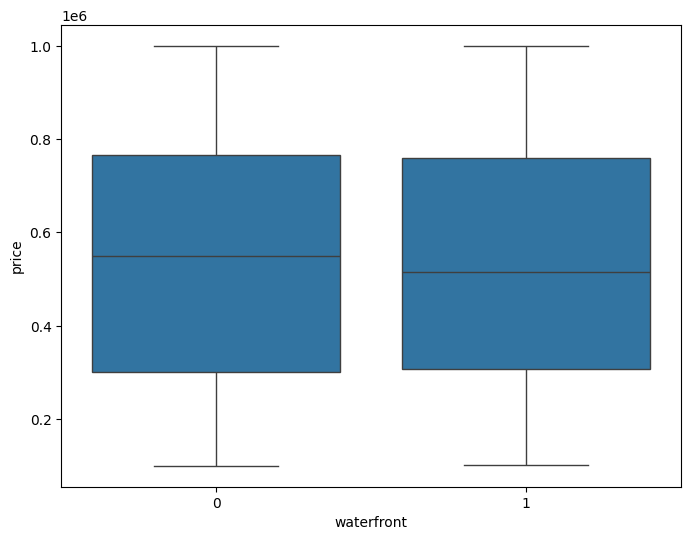

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="waterfront", y="price", data=df)

# Show plot
plt.show()


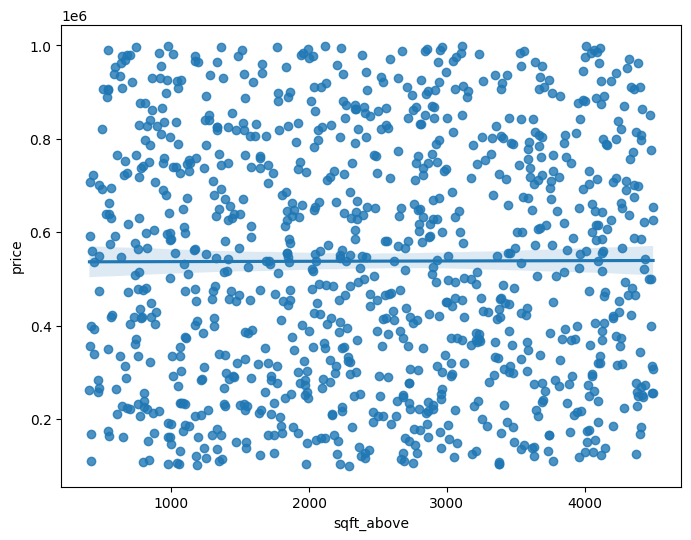

In [6]:

plt.figure(figsize=(8, 6))
sns.regplot(x="sqft_above", y="price", data=df)


plt.show()


In [7]:
from sklearn.linear_model import LinearRegression


X = df[["sqft_living"]]
y = df["price"]

# Fit model
model = LinearRegression()
model.fit(X, y)


r2 = model.score(X, y)
print(f"R^2: {r2}")


R^2: 1.788124737078789e-05


In [8]:

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]


model = LinearRegression()
model.fit(X, y)


r2 = model.score(X, y)
print(f"R^2: {r2}")


R^2: 0.009897245994894277


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])


pipeline.fit(X, y)


r2 = pipeline.score(X, y)
print(f"R^2: {r2}")


R^2: 0.09019314627454766


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


r2 = ridge.score(X_test, y_test)
print(f"R^2: {r2}")


R^2: 0.0013393183920424878


In [11]:
# Apply polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge model
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Calculate R^2 on test data
r2 = ridge_poly.score(X_test_poly, y_test)
print(f"R^2: {r2}")


R^2: -0.039536597626520065


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02196e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
